<a href="https://colab.research.google.com/github/NinaAbeyratne/Analysing_HCHO_gas_in_Sri_Lanka/blob/main/Spatio_Temporal_Analysis_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import KNNImputer
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [28]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
merged_data = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/merged_dataset.csv')

### Dropping Unnessary Columns

In [30]:
# Drop the 'TMAX' and 'TMIN' columns from the merged_data
merged_data.drop(['TMAX', 'TMIN'], axis=1, inplace=True)

In [31]:
merged_data

,HCHO_reading,City,Date,PRCP,TAVG
0,0.000197,Colombo Proper,2019-01-01,0.00,81
1,0.000116,Nuwara Eliya Proper,2019-01-01,0.00,61
2,0.000263,Colombo Proper,2019-01-02,0.00,78
3,0.000137,Kurunegala Proper,2019-01-02,0.00,78
4,0.000116,Nuwara Eliya Proper,2019-01-02,0.00,59
...,...,...,...,...,...
5225,0.000158,Kurunegala Proper,2023-12-30,0.47,80
5226,0.000140,Colombo Proper,2023-12-30,0.10,81
5227,0.000158,Kurunegala Proper,2023-12-31,0.06,79
5228,0.000080,Colombo Proper,2023-12-31,0.33,81


## Checking for Missing Values

In [32]:
# Check for missing data in the merged dataset
missing_data = merged_data.isnull().sum()

# Print the number of missing values for each column
print("Missing Data:")
print(missing_data)

Missing Data:
HCHO_reading     0
City             0
Date             0
PRCP            17
TAVG             0
dtype: int64


## Using ML algorithm ro replace missing values

In [42]:
# Select only the numeric columns for imputation
numeric_columns = ['PRCP', 'TAVG']
merged_data_numeric = merged_data[numeric_columns]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values for numeric columns
merged_data_imputed_numeric = pd.DataFrame(imputer.fit_transform(merged_data_numeric), columns=numeric_columns)

# Combine imputed numeric columns with non-numeric columns
merged_data_imputed = pd.concat([merged_data[['HCHO_reading', 'City', 'Date']], merged_data_imputed_numeric], axis=1)

In [43]:
# Check for missing data in the merged dataset
missing_data = merged_data_imputed.isnull().sum()

# Print the number of missing values for each column
print("Missing Data:")
print(missing_data)

Missing Data:
HCHO_reading    0
City            0
Date            0
PRCP            0
TAVG            0
dtype: int64


# Statistics

In [44]:
statistics = merged_data_imputed.describe()

In [45]:
statistics

,HCHO_reading,PRCP,TAVG
count,5230.000000,5230.000000,5230.000000
mean,0.000122,0.245725,74.951816
std,0.000095,0.569074,10.221190
min,-0.000229,0.000000,51.000000
25%,0.000058,0.000000,62.000000
50%,0.000116,0.000000,80.000000
75%,0.000180,0.200000,83.000000
max,0.000426,7.430000,92.000000


In [46]:
# Calculate mean for each column
mean_hcho = merged_data_imputed['HCHO_reading'].mean()
mean_prcp = merged_data_imputed['PRCP'].mean()
mean_tavg = merged_data_imputed['TAVG'].mean()

# Calculate median for each column
median_hcho = merged_data_imputed['HCHO_reading'].median()
median_prcp = merged_data_imputed['PRCP'].median()
median_tavg = merged_data_imputed['TAVG'].median()

# Calculate standard deviation for each column
std_hcho = merged_data_imputed['HCHO_reading'].std()
std_prcp = merged_data_imputed['PRCP'].std()
std_tavg = merged_data_imputed['TAVG'].std()

# Print the calculated statistics
print("HCHO Statistics:")
print("Mean:", mean_hcho)
print("Median:", median_hcho)
print("Standard Deviation:", std_hcho)
print("\nPRCP Statistics:")
print("Mean:", mean_prcp)
print("Median:", median_prcp)
print("Standard Deviation:", std_prcp)
print("\nTAVG Statistics:")
print("Mean:", mean_tavg)
print("Median:", median_tavg)
print("Standard Deviation:", std_tavg)

HCHO Statistics:
Mean: 0.00012198800855599573
Median: 0.0001160963242857
Standard Deviation: 9.517822487804616e-05

PRCP Statistics:
Mean: 0.24572466539196938
Median: 0.0
Standard Deviation: 0.569073849671072

TAVG Statistics:
Mean: 74.95181644359465
Median: 80.0
Standard Deviation: 10.22118980012386


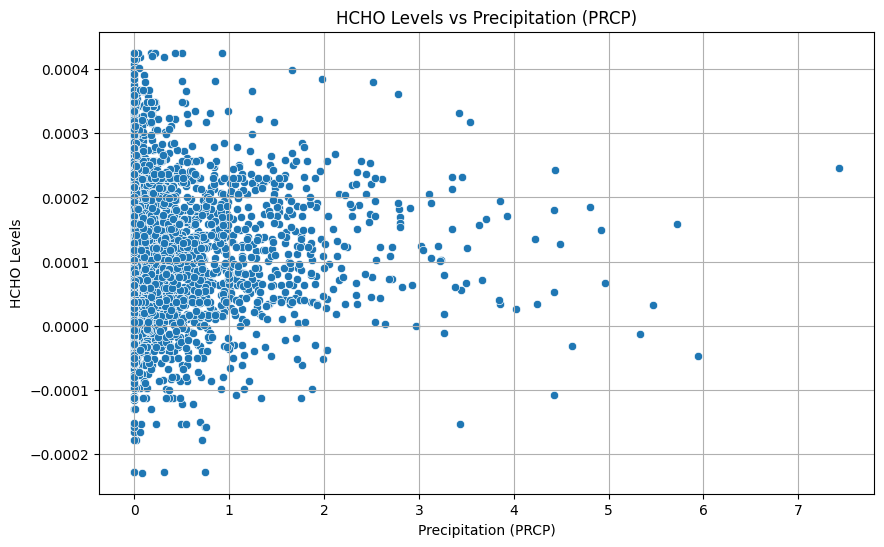

In [48]:
# Scatter plot for HCHO vs PRCP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_imputed, x='PRCP', y='HCHO_reading')
plt.title('HCHO Levels vs Precipitation (PRCP)')
plt.xlabel('Precipitation (PRCP)')
plt.ylabel('HCHO Levels')
plt.grid(True)
plt.show()

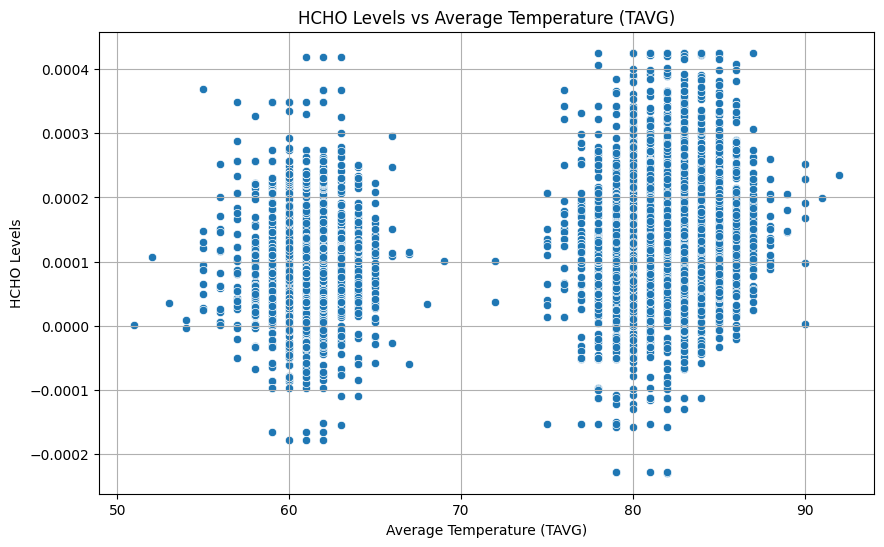

In [49]:
# Scatter plot for HCHO vs TAVG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_imputed, x='TAVG', y='HCHO_reading')
plt.title('HCHO Levels vs Average Temperature (TAVG)')
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('HCHO Levels')
plt.grid(True)
plt.show()

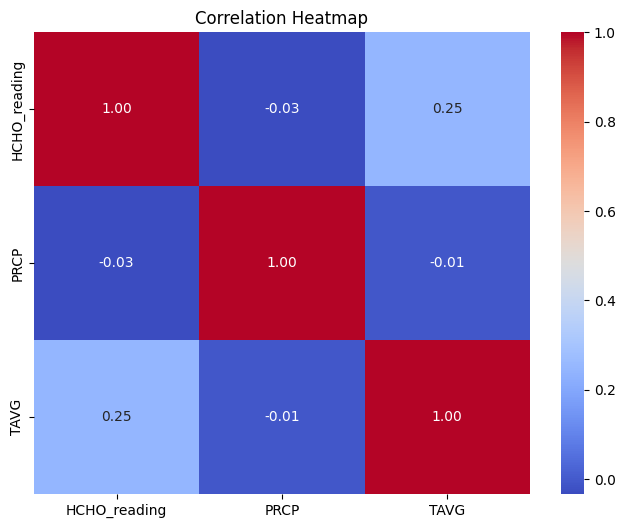

In [50]:
# Calculate correlation matrix
correlation_matrix = merged_data_imputed[['HCHO_reading', 'PRCP', 'TAVG']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## External Factors

In [51]:
# Prepare the altitude and population data
altitude_population_data = {
    'City': ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper', 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper', 'Kandy Proper'],
    'Altitude(m)': [3, 200, 1868, 175, 116, 10, 500],
    'Population': [752993, 809344, 27500, 38386, 1610299, 88138, 125400]
}
altitude_population_df = pd.DataFrame(altitude_population_data)

In [53]:
# Merge with HCHO data
merged_data_with_altitude_population = pd.merge(merged_data_imputed, altitude_population_df, on='City')

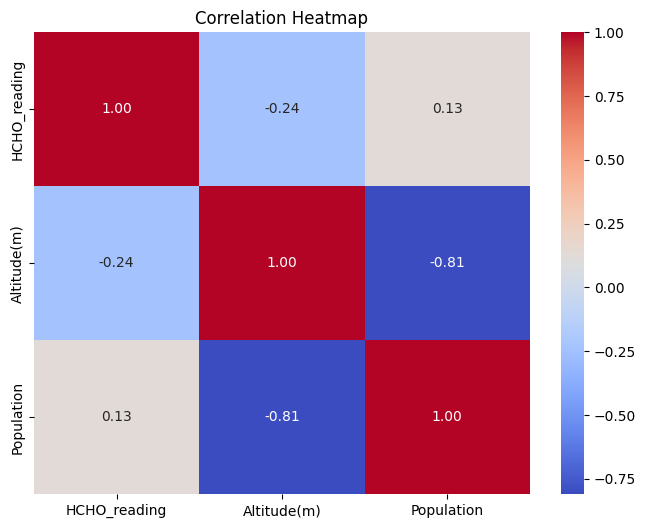

In [54]:
# Calculate correlation matrix
correlation_matrix = merged_data_with_altitude_population[['HCHO_reading', 'Altitude(m)', 'Population']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

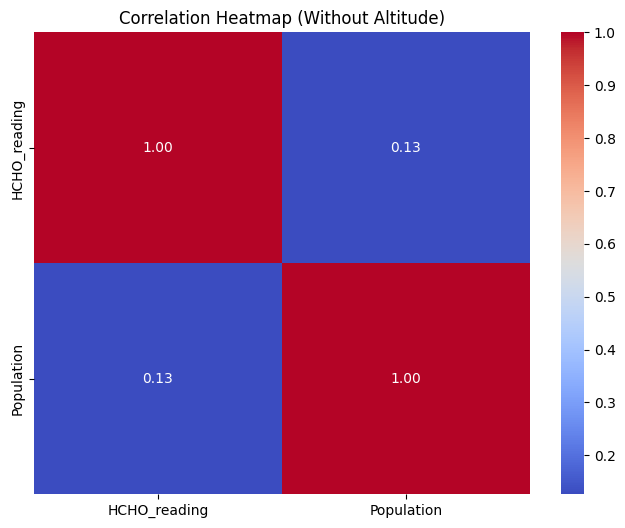

In [55]:
# Remove 'Altitude(m)' column from the merged dataset
merged_data_with_population = merged_data_with_altitude_population.drop(columns=['Altitude(m)'])

# Calculate correlation matrix without altitude
correlation_matrix = merged_data_with_population[['HCHO_reading', 'Population']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Without Altitude)')
plt.show()


# Model Training

In [57]:
# Preprocess the data
merged_data_with_population['Date'] = pd.to_datetime(merged_data_with_population['Date'])
merged_data_with_population.set_index('Date', inplace=True)

In [58]:
# Check for stationarity
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [62]:
# Check unique values of relevant columns after conversion
print(merged_data_with_population['HCHO_reading'].unique())
print(merged_data_with_population['PRCP'].unique())
print(merged_data_with_population['TAVG'].unique())

# Find and handle remaining non-numeric values
non_numeric_hcho = merged_data_with_population[~merged_data_with_population['HCHO_reading'].apply(lambda x: isinstance(x, (int, float)))]
non_numeric_prcp = merged_data_with_population[~merged_data_with_population['PRCP'].apply(lambda x: isinstance(x, (int, float)))]
non_numeric_tavg = merged_data_with_population[~merged_data_with_population['TAVG'].apply(lambda x: isinstance(x, (int, float)))]

# Display rows with non-numeric values
print("Rows with non-numeric HCHO values:")
print(non_numeric_hcho)

print("Rows with non-numeric PRCP values:")
print(non_numeric_prcp)

print("Rows with non-numeric TAVG values:")
print(non_numeric_tavg)


[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.59843166e-04
 7.54708547e-05 1.57848076e-04]
[0.    0.52  0.06  0.02  2.78  0.09  0.85  1.44  0.49  0.01  0.17  0.46
 0.91  0.19  0.64  0.99  0.22  0.4   0.86  2.05  0.43  1.15  0.04  0.03
 0.41  0.33  1.66  1.63  0.1   0.12  0.11  0.07  0.38  0.32  0.08  2.91
 0.28  1.39  0.88  0.18  0.15  1.73  0.14  1.97  0.24  0.69  0.13  1.23
 2.03  0.16  0.42  2.02  0.8   1.76  2.29  1.07  4.42  0.26  0.37  0.23
 4.96  3.5   1.33  0.45  0.59  0.95  1.04  0.63  1.53  0.2   0.65  1.3
 0.83  0.54  0.21  0.67  0.35  1.87  0.96  0.72  0.87  0.05  0.78  0.73
 1.11  2.09  1.31  1.5   3.23  2.24  1.16  2.34  0.57  0.36  1.77  0.44
 1.37  0.79  0.7   0.34  1.62  3.35  1.08  1.27  0.3   3.42  1.24  0.31
 0.71  2.    1.46  1.79  5.94  0.47  0.9   0.76  1.13  1.52  0.39  1.41
 0.48  0.212 4.61  4.44  0.74  0.98  0.29  1.03  0.078 0.6   2.3   1.92
 1.1   3.86  3.04  1.36  1.38  1.88  1.48  0.5   5.33  1.28  0.25  1.01
 2.22  1.93  0.92  1.69  1.    1.58  0.2

In [64]:

# Differencing to achieve stationarity if necessary
hcho_data_diff = merged_data_with_population['HCHO_reading'].diff().dropna()

# Check stationarity of differenced data
check_stationarity(hcho_data_diff)


ADF Statistic: -19.66136168653929
p-value: 0.0
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [66]:
# Fit ARIMA model
model = ARIMA(hcho_data_diff, order=(5,1,0))  # may need to tune these parameters
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:           HCHO_reading   No. Observations:                 5229
Model:                 ARIMA(5, 1, 0)   Log Likelihood               41276.002
Date:                Thu, 18 Apr 2024   AIC                         -82540.005
Time:                        01:21:31   BIC                         -82500.634
Sample:                             0   HQIC                        -82526.237
                               - 5229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1622   7.21e-20  -1.61e+19      0.000      -1.162      -1.162
ar.L2         -1.0528   1.29e-20  -8.17e+19      0.000      -1.053      -1.053
ar.L3         -0.8331   6.29e-20  -1.32e+19      0.0

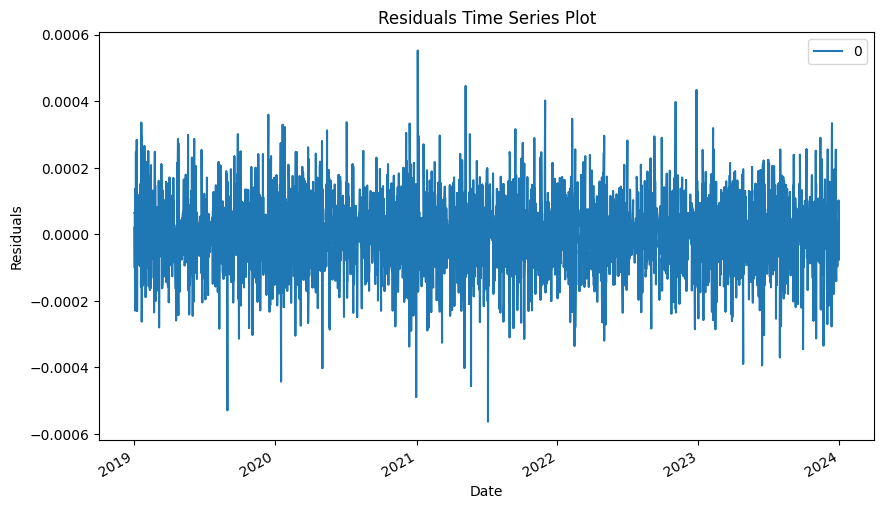

In [67]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(10, 6))
plt.title('Residuals Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [74]:
# Evaluate model performance
predictions_diff = model_fit.forecast(steps=len(hcho_data_diff))
index = hcho_data_diff.index
start_index = index[-1] + pd.DateOffset(days=1)
end_index = start_index + pd.DateOffset(days=len(predictions_diff) - 1)
predictions_index = pd.date_range(start=start_index, end=end_index)
predictions = hcho_data_diff.iloc[-1] + np.cumsum(predictions_diff)
predictions.index = predictions_index
mse = mean_squared_error(hcho_data_diff, predictions_diff)
print('Mean Squared Error:', mse)


Mean Squared Error: 7.992734912133382e-09


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


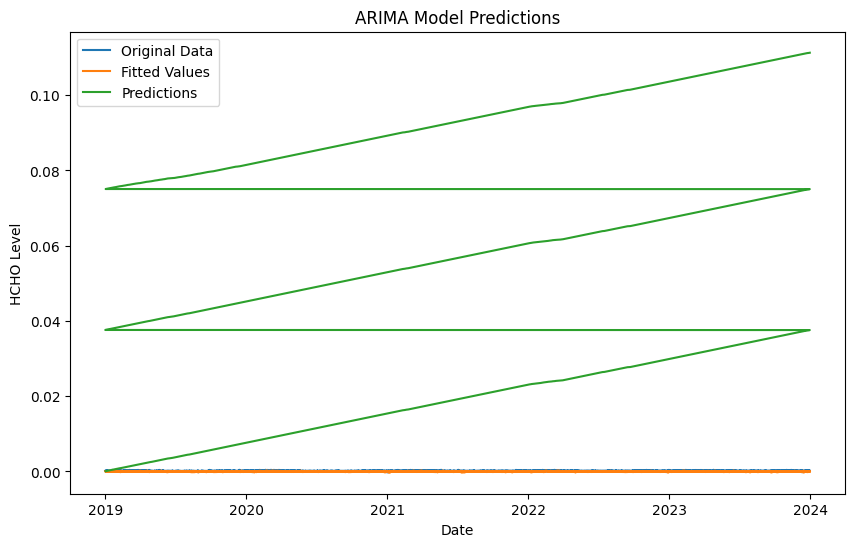

In [75]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(merged_data_with_population.index, merged_data_with_population['HCHO_reading'], label='Original Data')
plt.plot(hcho_data_diff.index, hcho_data_diff.iloc[0] + np.cumsum(model_fit.fittedvalues), label='Fitted Values')
plt.plot(hcho_data_diff.index, hcho_data_diff.iloc[0] + np.cumsum(predictions_diff), label='Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.legend()
plt.show()

In [78]:
# Calculate Mean Squared Error
mse = mean_squared_error(hcho_data_diff, predictions_diff)
print('Mean Squared Error (MSE):', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(hcho_data_diff, predictions_diff)
print('Mean Absolute Error (MAE):', mae)

# Calculate R-squared
r2 = r2_score(hcho_data_diff, predictions_diff)
print('R-squared (R^2):', r2)

Mean Squared Error (MSE): 7.992734912133382e-09
Mean Absolute Error (MAE): 6.120417200054101e-05
R-squared (R^2): -0.06019648176729819
